## Ejercicio 7.17
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_7.29.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

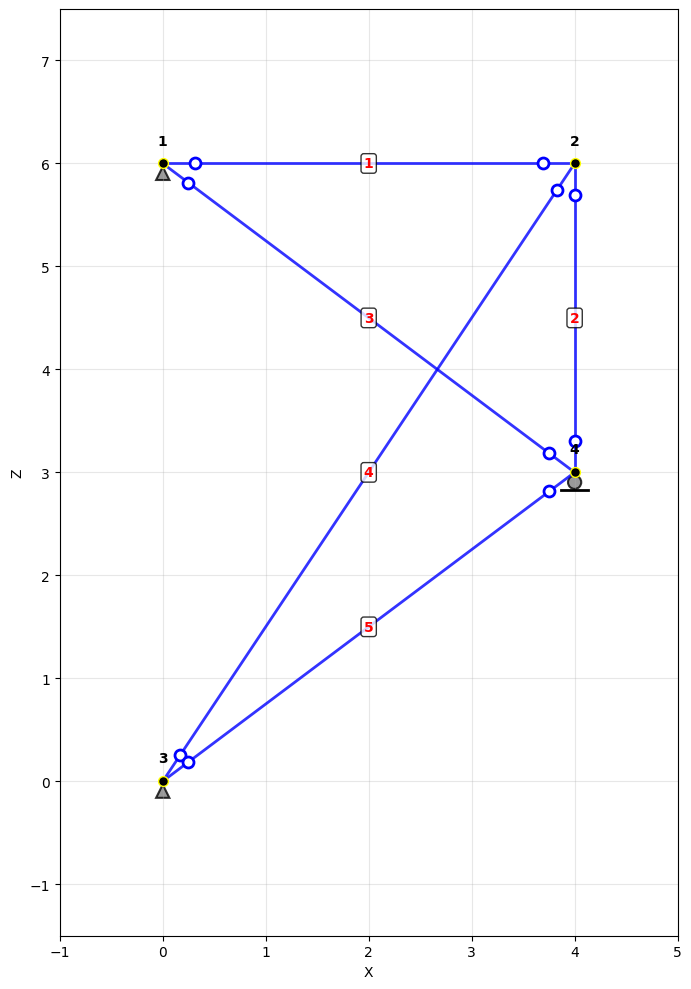

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 70*1e6
A = 2500*1e-6
I = 1

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=6)
system.defineNode(2, x=4, z=6)
system.defineNode(3, x=0, z=0)
system.defineNode(4, x=4, z=3)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(4, ux=False, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 4, 2, A=A, E=E, I=I)
system.defineElement(3, 1, 4, A=A, E=E, I=I)
system.defineElement(4, 3, 2, A=A, E=E, I=I)
system.defineElement(5, 3, 4, A=A, E=E, I=I)

# Asignación de Cargas
system.assignJoint.force(2, fx=300, fz=-600, my=0)
system.assignJoint.force(4, fx=300, fz=0, my=0)

# incrementto de temperatura
system.assignElement.temperatureLoad(2, dT=40, alpha=2.5*1e-5)
system.assignElement.temperatureLoad(5, dT=-16, alpha=2.5*1e-5)

# falla por fabricacion
L4 = system.Elements[4].length
dL = (4/1000)/L4
system.assignElement.temperatureLoad(4, dT=dL, alpha=1)

# Configuración de Liberaciones en Elementos
for i in range(5):
    system.assignElement.releases(i+1, start=True, end=True)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 4
Número de elementos: 5
Grados de libertad totales: 12
Grados de libertad restringidos (desplazamientos conocidos): 9 de 12
GL restringidos: [ 0  1  2  5  6  7  8 10 11]
Grados de libertad libres (fuerzas conocidas): 3 de 12
GL libres: [3 4 9]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (3x3):
  |         3 |          4 |          9 |

  |      51217 |      11201 |          0 |
  |      11201 |      75134 |          0 |
  |          0 |          0 |      44800 |
 
KAB (3x9):
  |         0 |          1 |          2 |          5 |          6 |          7 |          8 |         10 |         11 |
 
  |     -43750 |          0 |          0 | 

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 3
PROPIEDADES
  Longitud: 4.000
  Área (A): 2.5000e-03
  Módulo elástico (E): 7.0000e+07
  Momento de inercia (I): 1.0000e+00
  Liberaciones:  Nodo i = SÍ | Nodo j = SÍ
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  |  43750.000 |      0.000 |      0.000 | -43750.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
 

In [5]:
system.getInfoNodes()

Node 1: (0, 6) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=-479.756, Fz=91.500, My=0.000

Node 2: (4, 6) - Libre
  Desplazamientos: Ux=8.1773e-03, Uz=-5.8006e-03, Ry=0.0000e+00
  Fuerzas: Fx=300.000, Fz=-600.000, My=0.000

Node 3: (0, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=-120.244, Fz=-46.866, My=0.000

Node 4: (4, 3) - Móvil en X
  Desplazamientos: Ux=5.4464e-03, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=300.000, Fz=555.366, My=0.000


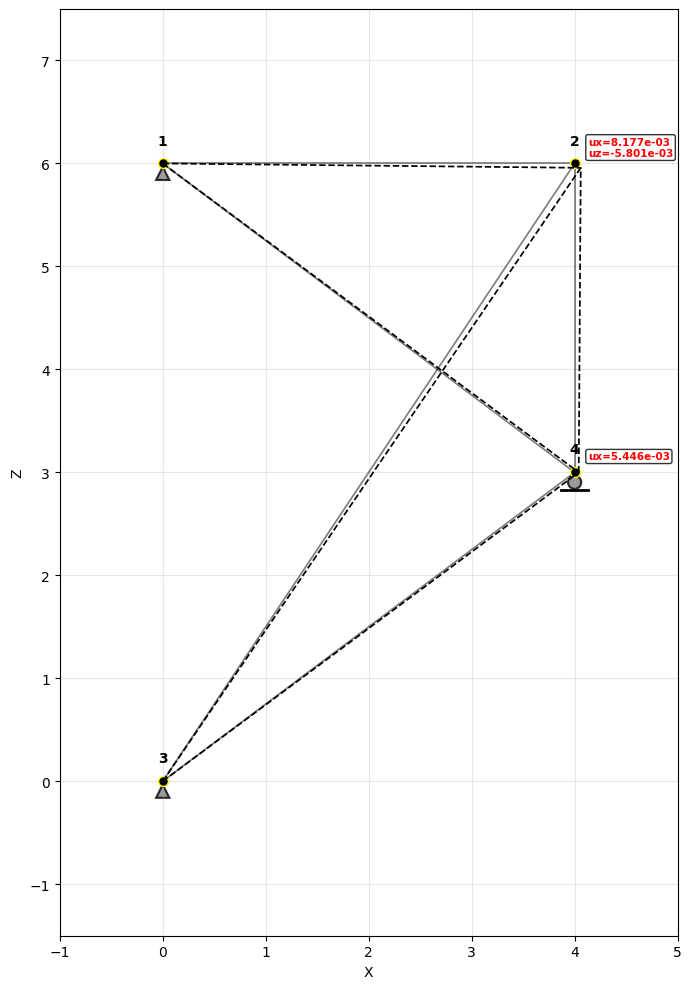

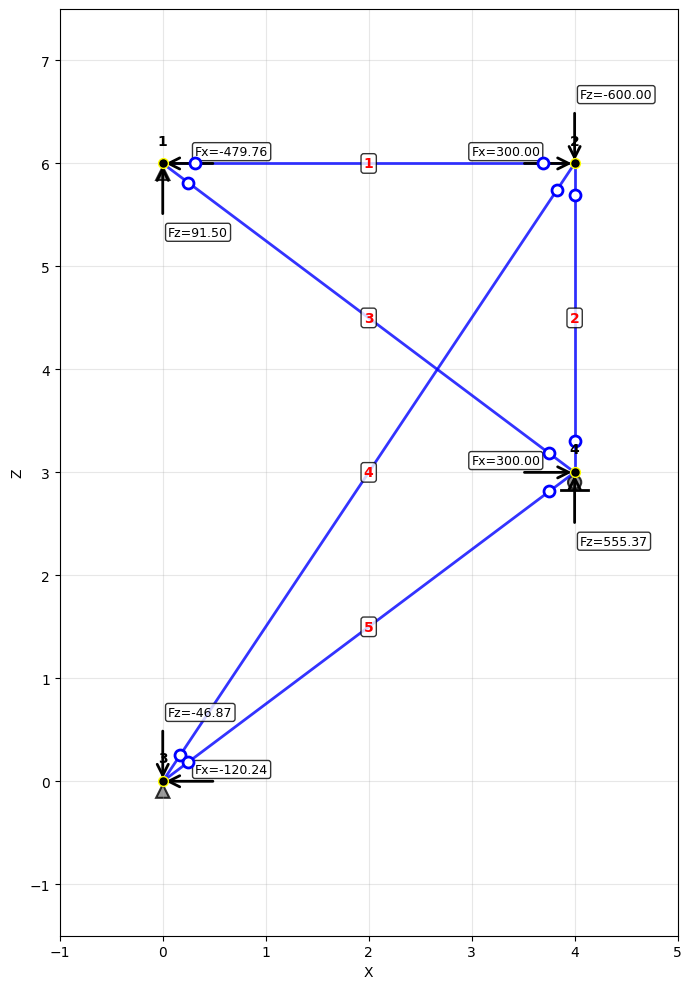

In [6]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.1)
plotter.showReactions()